### CHAPTER08 고급 인공 신경망 구현 (p.313)

#### 8.1 앞서 살펴본 붓꽃 데이터를 입력으로 하여 Versicolor, Setosa, Virginica 3종의 품종을 구분하는 심층 신경망을 구성하도록 하자. 이 때 다음과 같은 절차에 따라 순차 심층 신경망 모델을 생성하자.

#### 1) 제공되는 150개의 입력 데이터에 대하여 70%를 훈련용 데이터로 사용하고 30%를 테스트용 데이터로 사용하도록 하자. 따라서 105개의 훈련용 데이터와 45개의 학습용 데이터가 생성된다. 이제 다음과 같이 훈련용 데이터의 형태와 레이블, 테스트용 데이터의 형태와 레이블의 shape을 출력해 보자. 마지막으로 개별 훈련 데이터의 형태도 출력해 보자.

```
훈련용 데이터의 형태: (105, 4)
훈련용 데이터의 레이블 형태: (105,)
테스트용 데이터의 형태: (45, 4)
테스트용 데이터의 레이블 형태: (45,)
개별 훈련 데이터의 형태: (4,)
```

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

data   = iris['data']
target = iris['target']

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, stratify=target, random_state=34)

print('훈련용 데이터의 형태:', x_train.shape)
print('훈련용 데이터의 레이블 형태:', y_train.shape)
print('테스트용 데이터의 형태:', x_test.shape)
print('테스트용 데이터의 레이블 형태:', y_test.shape)
print('개별 훈련 데이터의 형태:', x_train[0].shape)

훈련용 데이터의 형태: (105, 4)
훈련용 데이터의 레이블 형태: (105,)
테스트용 데이터의 형태: (45, 4)
테스트용 데이터의 레이블 형태: (45,)
개별 훈련 데이터의 형태: (4,)


#### 2) 꽃받침의 길이와 너비 및 꽃잎의 길이와 너비와 같은 4개의 값을 입력층의 입력으로 가지도록 하자.

#### 3) 64개의 노드를 가지는 하나의 은닉층 노드를 만들자

In [2]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

#### 4) 손실함수는 sparse_categorical_crossentropy, 최적화 함수는 adam 최적화, 정확도는 accuracy 값을 가지도록 하자.

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### 5) 모델을 훈련시킬때 배치의 크기는 5, 에폭의 수는 30으로 두자.

#### 6) 위와 같은 순차 신경망을 만들어서 테스트 데이터에 대한 모델의 분류를 위한 학습을 시켜보자. 이때 정확도는 다음과 같이 90% 이상이 되도록 하이퍼파라미터를 튜닝하도록 하자.

```
신경망 모델의 학습 결과 :
2/2 [===============================] - 0s 5ms/step - loss: 0.3348 - accuracy: 0.9333
붓꽃 데이터의 분류 정확도 : 0.9333333373069763
```

In [4]:
print('신경망 모델의 학습 결과 :')
history = model.fit(x_train, y_train, batch_size=5, epochs=30, verbose=0)
print('붓꽃 데이터의 분류 정확도 :', history.history['accuracy'][-1])

신경망 모델의 학습 결과 :
붓꽃 데이터의 분류 정확도 : 0.9809523820877075


#### 7) 사용된 하이퍼 파라미터를 구체적으로 적어보도록 하자.

#### 8) 다음과 같이 각 에폭 단계별 손실 값의 변화와 정확도 값의 변화를 출력하도록 하자.

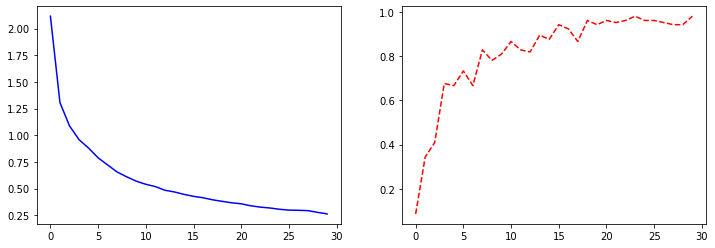

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(history.history['loss'], 'b-')

plt.subplot(122)
plt.plot(history.history['accuracy'], 'r--')

#### 9) 이 순차 네트워크에 드롭아웃을 사용하여 네트워크의 성능을 개선시킬 수 있을지 알아보자. 드롭아웃 비율을 각각 20%와 30%로 한 다음 붓꽃 데이터의 분류 정확도를 출력해 보자.

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=5, epochs=30, verbose=0)
print('드롭아웃 비율 20%: ', history.history['accuracy'][-1])

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=5, epochs=30, verbose=0)
print('드롭아웃 비율 30%: ', history.history['accuracy'][-1])

드롭아웃 비율 20%:  0.7428571581840515
드롭아웃 비율 30%:  0.6761904954910278


#### 10) 다음으로 아래와 같이 개의 은닉층을 가지는 신경망을 구축해 보도록 하자. 이 신경망의 훈련 정확도의 최대값과 테스트 데이터의 분류 정확도를 알아보도록 하자.

```
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax'),
])
```

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(3, activation='softmax'),
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

import numpy as np
history = model.fit(x_train, y_train, batch_size=5, epochs=30, verbose=0)
print('훈련 정확도의 최대값: ', np.max(history.history['accuracy']))

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('테스트 정확도:', test_acc)

훈련 정확도의 최대값:  0.9809523820877075
테스트 정확도: 0.9777777791023254
